<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-подготовке-данных:" data-toc-modified-id="Выводы-по-подготовке-данных:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы по подготовке данных:</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Исследование-моделей-на-сбалансированной-выборке" data-toc-modified-id="Исследование-моделей-на-сбалансированной-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование моделей на сбалансированной выборке</a></span><ul class="toc-item"><li><span><a href="#Подбор-новых-гиперпараметров-и-проверка-метрик-качества-модели-на-upsampled---обучающей-выборке" data-toc-modified-id="Подбор-новых-гиперпараметров-и-проверка-метрик-качества-модели-на-upsampled---обучающей-выборке-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Подбор новых гиперпараметров и проверка метрик качества модели на upsampled - обучающей выборке</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Подбор-новых-гиперпараметров-и-проверка-метрик-качества-модели-на-downsampled---обучающей-выборке" data-toc-modified-id="Подбор-новых-гиперпараметров-и-проверка-метрик-качества-модели-на-downsampled---обучающей-выборке-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Подбор новых гиперпараметров и проверка метрик качества модели на downsampled - обучающей выборке</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Взвешаивание-классов" data-toc-modified-id="Взвешаивание-классов-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Взвешаивание классов</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
from sklearn.metrics import (accuracy_score, 
                             recall_score, 
                             precision_score, 
                             f1_score,
                             confusion_matrix, 
                             roc_auc_score, 
                             roc_curve)

In [2]:
#Читаем данные
try:
    data = pd.read_csv('Churn.csv')
except:
    data = pd.read_csv('/datasets/Churn.csv')

**Признаки**
* `RowNumber` — индекс строки в данных
* `CustomerId` — уникальный идентификатор клиента
* `Surname` — фамилия
* `CreditScore` — кредитный рейтинг
* `Geography` — страна проживания
* `Gender` — пол
* `Age` — возраст
* `Tenure` — сколько лет человек является клиентом банка
* `Balance` — баланс на счёте
* `NumOfProducts` — количество продуктов банка, используемых клиентом
* `HasCrCard` — наличие кредитной карты
* `IsActiveMember` — активность клиента
* `EstimatedSalary` — предполагаемая зарплата

**Целевой признак**
* `Exited` — факт ухода клиента

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
#Видео значительный разброс данных. Потребуется привести их к одной шкале.
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,9091.0,NaN,NaN,NaN,4.99769,2.894723,0.0,2.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


In [6]:
#Избавимся от части категориальных колонок, которые не влияют на принятие решения о том уйдет ил клиент или нет.
#Отбросим колонки RowNumber, CustomerId, Surname, поскольку они не несут в себе никакой важной информации о клиенте.
#Из категориальных переменных, у нас остануются "Geography и Gender их загодируем методом OHE"
data_clear = data.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
data_clear.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [7]:
#Отлично, категориальные переменные закодировали. Теперь нужно масштабировать переменные.
data_ohe = pd.get_dummies(data_clear, drop_first = True)
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [8]:
#Посмотрим как дела с пропусками
data_ohe.isna().sum()
#Пропуски присутствуют в переменной Tenure, она показывает сколько лет человек является клиентом банка.
#Полагаю, что пропуск тут  означает, что человек является клиентом меньше 1 года. 
#Замена пропусков на еденицы, думаю, не повлияет на точность предсказания. Однако сама идея, 
#что мы придумываем данные, чтобы делать прогнозы на их основе мне кажется не очень хорошей историей. К тому же пропусков ~9%.
#Короче, удаляем пропуски :)
data_ohe = data_ohe.dropna(subset=['Tenure'])
data_ohe.isna().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [9]:
features = data_ohe.drop(['Exited'], axis = 1) 
target = data_ohe['Exited']

#Разделим данные на тренировочную, тестовую выборку. Укажем параметр stratify, чтобы распределнние таргета было +- 
#одинаковым в тренировочном и тестовом наборе 
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.4, 
                                                                            random_state=42, stratify = target)
#Тестовую выборку разделим на тестовую и валидационную
features_test, features_valid, target_test, target_valid  = train_test_split(features_test, target_test, test_size=0.5, 
                                                                             random_state=42, stratify = target_test)
ones = round(len(target[target == 1])/len(target)*100, 2)
zeros = round(len(target[target == 0])/len(target)*100, 2)

ones_train = round(len(target_train[target_train == 1])/len(target_train)*100, 2)
zeros_train = round(len(target_train[target_train == 0])/len(target_train)*100, 2)

ones_valid = round(len(target_valid[target_valid == 1])/len(target_valid)*100, 2)
zeros_valid = round(len(target_valid[target_valid == 0])/len(target_valid)*100, 2)

ones_test = round(len(target_test[target_test == 1])/len(target_test)*100, 2)
zeros_test = round(len(target_test[target_test == 0])/len(target_test)*100, 2)

#Проверим размеры выборок и распределение таргета в них
print(f'Размер исходного набора данных: {len(features)}, доля 1: {ones}, доля 0: {zeros}')
print(f'Размер тренировочного набора данных: {len(features_train)}, доля 1: {ones_train}, доля 0: {zeros_train}')
print(f'Размер валидационного набора данных: {len(features_valid)}, доля 1: {ones_valid}, доля 0: {zeros_valid}')
print(f'Размер тестового набора данных: {len(features_test)}, доля 1: {ones_test}, доля 0: {zeros_test}')

#Выборки разбиты в нужном соотношении, распределение таргета во всех  трех выборках соответствует распределению в исходном наборе данных.

Размер исходного набора данных: 9091, доля 1: 20.39, доля 0: 79.61
Размер тренировочного набора данных: 5454, доля 1: 20.39, доля 0: 79.61
Размер валидационного набора данных: 1819, доля 1: 20.4, доля 0: 79.6
Размер тестового набора данных: 1818, доля 1: 20.41, доля 0: 79.59


In [10]:
#Масштабируем признаки во всех выборках:
scaler = StandardScaler()
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler.fit(features_train[numeric])

StandardScaler()

In [11]:
#Масштабируем обучающий набор данных
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3228,-0.689347,-0.944503,1.737181,-1.223083,0.813512,1,1,0.194467,0,0,0
3741,0.913235,-0.944503,1.391431,1.004114,-0.918297,1,0,0.725671,1,0,0
8763,0.799504,2.116464,-1.720318,0.829721,0.813512,1,1,1.539459,0,0,1
4127,0.644415,1.255567,1.391431,-1.223083,-0.918297,1,1,0.310683,0,1,1
8751,-0.772061,-0.848848,1.045681,-1.223083,0.813512,1,0,1.480628,0,1,0


In [12]:
#Масштабируем валидационный набор данных
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2285,-0.203403,1.064257,-0.683068,0.848244,4.277129,1,1,-0.908549,1,0,1
9729,0.013721,-1.518435,1.737181,-1.223083,0.813512,1,1,1.215906,0,0,1
7488,-1.154613,0.299015,-0.337319,0.063866,-0.918297,1,0,0.332201,1,0,0
865,0.292881,-1.327124,1.737181,0.009236,0.813512,0,1,0.545565,1,0,0
1227,-0.958168,-1.040159,0.699931,1.121617,0.813512,1,0,1.462845,0,0,0


In [13]:
#Масштабируем тестовый набор данных
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3571,0.148131,-0.274917,0.354181,-0.084033,0.813512,1,0,0.388066,1,0,1
2208,0.809843,0.681636,-1.028818,0.533386,-0.918297,1,0,-1.386128,0,0,0
4956,0.106774,-0.561882,-1.028818,0.065179,-0.918297,0,0,0.874168,0,1,1
4881,-0.730704,-0.753193,0.354181,-1.223083,0.813512,1,0,-1.284140,0,0,1
1862,-1.743950,0.490325,1.391431,1.583653,-0.918297,1,0,-0.600708,0,0,1


### Выводы по подготовке данных:
Исследован исходный набор данных.

Отброшены колонки, не играющие роль в принятии решения об уходе клиента из банка. Все категориальные переменные закодированы методом One-Hot Encoding. 

Данные разбиты на 3 выборки: обучающую, валидационную и тестовую в соотношении 3:1:1. Распределение целевой переменной одинаково во всех трех выборках.

В исходном наборе данных наблюдается значительный разброс численных переменных. Для корректного обучения модели, все численные переменные приведены к одному масштабу во всех трех выборках.

## Исследование задачи

In [14]:
#Проверим насколько сбалансированы классы в целевой переменной.
pdata = len(data_clear.loc[data_clear['Exited'] == 1, ['Exited']])
fdata = len(data_clear.loc[data_clear['Exited'] == 0, ['Exited']])
print(f'Доля объектов положительного класса: {pdata/len(data)}, доля объектов отрицательного класса: {fdata/len(data)}')

Доля объектов положительного класса: 0.2037, доля объектов отрицательного класса: 0.7963


In [15]:
%%time
#Обучим модели на имеющемся распределении таргета, подберем лучшие гиперпараметры. 
#Так как Accuracy как метрика качества модели в данном случае не подходит из-за дисбаланса в таргете, 
#то будем ориентироваться на F1-score, ну и accuracy выведем за компанию.
#Логистическая регрессися
best_iter = 0
accuracy_log = 0
best_f1_log = 0

for iter in range(100,200):
    model = LogisticRegression(solver = 'liblinear', random_state=42, max_iter=iter)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions)
    f1 = f1_score(target_valid, predictions)
    if f1 > best_f1_log:
        best_f1_log = f1 
        best_iter = iter
        accuracy_log = accuracy
    #print(f' F1 - score = {f1}, Accuracy = {accuracy}, iter = {iter}')
print(f'Лучшее качество модели: {best_f1_log}, Accuracy при этом - {accuracy_log}, соответствующее количество итераций: {best_iter}')

Лучшее качество модели: 0.3175803402646503, Accuracy при этом - 0.8015393073117097, соответствующее количество итераций: 100
CPU times: total: 2.52 s
Wall time: 2.56 s


In [16]:
#Запишем параметры лучшей модели
LR = LogisticRegression(solver = 'liblinear', random_state=42, max_iter=100)

In [17]:
#Прикол, чето от количества итерацй качество модели у нас не меняется. Посмотрим что она вообще предсказвает
pd.Series(predictions).value_counts(normalize = 1)
#Логистическая регрессия почти всегда предсказывает 0. Причина в том, что таргет не сбалансирован (Наверное)))

0    0.913139
1    0.086861
dtype: float64

In [18]:
%%time
#Случайный лес
best_estim_forest = 0
best_depth_forest = 0
accuracy_forest = 0
best_f1_forest = 0

for depth in range(1, 51):
    model = RandomForestClassifier(random_state=42, max_depth = depth, n_estimators=50)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions)
    f1 = f1_score(target_valid, predictions)
    if f1 > best_f1_forest:
        best_f1_forest = f1
        accuracy_forest = accuracy
        best_depth_forest = depth
print(f'Точность модели - {best_f1_forest}, accuracy при этом - {accuracy}, соответствующая глубина {best_depth_forest}')

for est in range(1, 100):
    model = RandomForestClassifier(random_state=42, max_depth = 23, n_estimators=est)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions)
    f1 = f1_score(target_valid, predictions)
    if f1 > best_f1_forest:
        best_f1_forest = f1
        accuracy_forest = accuracy
        best_estim_forest = est
#    print(f'F1 = {f1}, Accuracy = {accuracy}, est = {est}')

print(f'Точность модели - {best_f1_forest},  Accuracy при этом - {accuracy_forest}, соответствующее ей количество деревьев {best_estim_forest}')

Точность модели - 0.5905383360522023, accuracy при этом - 0.8609125893347993, соответствующая глубина 25
Точность модели - 0.5984,  Accuracy при этом - 0.8620120945574491, соответствующее ей количество деревьев 55
CPU times: total: 2min 3s
Wall time: 2min 6s


In [103]:
RFC = RandomForestClassifier(random_state=42, max_depth = 25, n_estimators=55)

In [20]:
#Сравним точность настроенных моделей с точностью константной модели предсказания
dmb_model = DummyClassifier(strategy='most_frequent', random_state=42)
dmb_model.fit(features_train, target_train)
dmb_accucacy = dmb_model.score(features_test, target_test)
print("Качество прогноза при прогнозировании наиболее часто встречаемого признака:", dmb_accucacy)
print("Качество прогноза логистической регрессии:", best_f1_log)
print("Качество прогноза случайного леса:", best_f1_forest)

#Получили качество прогноза при присваивании целевой переменной самог очастовстречаемого признака выше, чем в обученных моделях.
#Думаю, что проблема в том, что из - за того, что таргет не сбалансирован, модели чаще предсказывают тот класс, который встречается чаще всего
#Попробуем разобраться точнее и всглянем на матрицу ошибок

Качество прогноза при прогнозировании наиболее часто встречаемого признака: 0.7959295929592959
Качество прогноза логистической регрессии: 0.3175803402646503
Качество прогноза случайного леса: 0.5984


In [21]:
#Логистическая регрессия
LR.fit(features_train, target_train)
LR_pred = LR.predict(features_valid)
confusion_matrix(target_valid, LR_pred)

#Видно, что TP ответов больше всего. Это логично, тк модель в 90% случаев предсказывает 0. Но FN и FP тоже не мало. 
#Причем модель склонна чаще предсказывать ложнополодительные ответы, причиной этому является дисбаланс классов: 
#На 0 модель обучилась хорошо, а на 1 значительно хуже

array([[1374,   74],
       [ 287,   84]], dtype=int64)

In [22]:
#Расчитаем метрику ROC_AUC для логистической регрессии
LR_prob_ones = LR.predict_proba(features_valid)[:, 1]
LR_auc_roc_before = roc_auc_score(target_valid, LR_prob_ones)
LR_auc_roc_before

0.7576320531339815

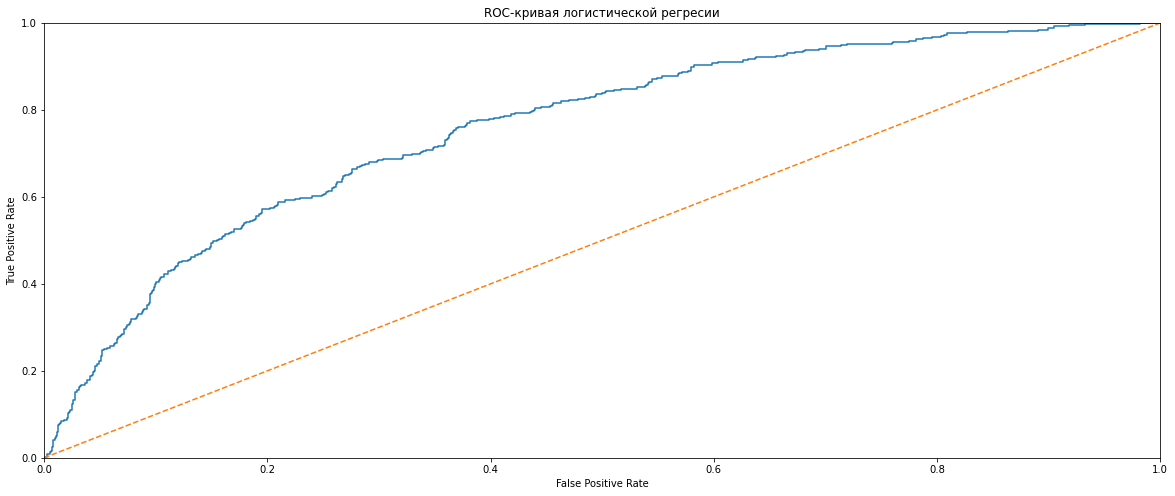

In [23]:
#ROC - кривая логистической регрессии
fpr, tpr, thresholds = roc_curve(target_valid, LR_prob_ones) 

plt.figure(figsize=(20,8))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая логистической регресии')
plt.show()

In [104]:
#Случайный лес
RFC.fit(features_train, target_train)
RFC_pred = RFC.predict(features_valid)
confusion_matrix(target_valid, RFC_pred)

#Для случайного леса ситуация аналогична. Требуется исправить дисбаланс классов в таргете.

array([[1379,   69],
       [ 189,  182]], dtype=int64)

In [105]:
#Расчитаем метрику ROC_AUC для случайного леса
RFC_prob_ones = RFC.predict_proba(features_valid)[:, 1]
RFC_auc_roc_before = roc_auc_score(target_valid, RFC_prob_ones)
RFC_auc_roc_before

0.8360616372057006

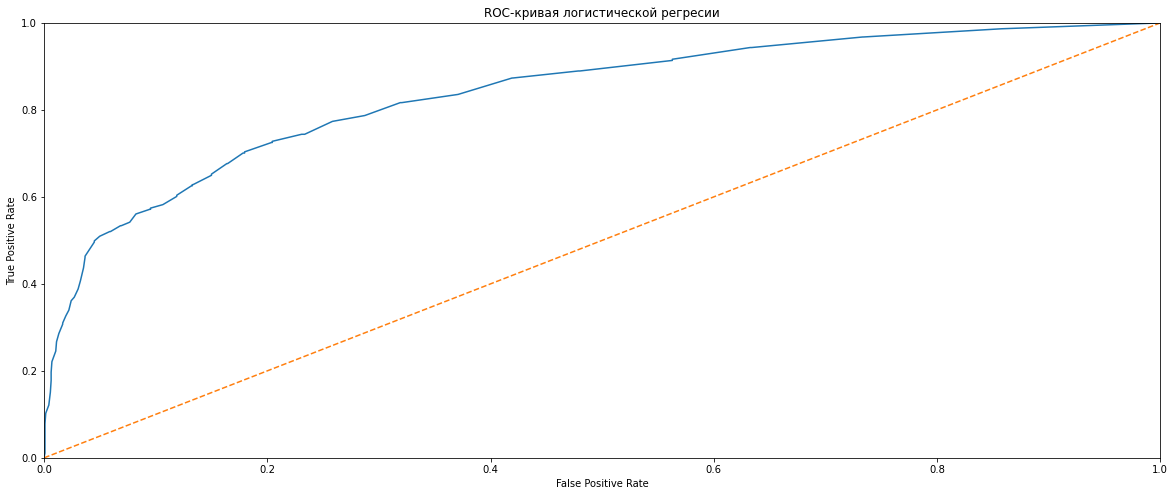

In [26]:
#ROC - кривая случайного леса
fpr, tpr, thresholds = roc_curve(target_valid, RFC_prob_ones) 

plt.figure(figsize=(20,8))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая логистической регресии')
plt.show()

In [106]:
#Взглянем на метрики обученных моделей. Сравним их после исправления дисбаланса классов.
RFC_recall_before = recall_score(target_valid, RFC_pred)
RFC_precision_before = precision_score(target_valid, RFC_pred)
RFC_f1_before = f1_score(target_valid, RFC_pred)

LR_recall_before = recall_score(target_valid, LR_pred)
LR_precision_before = precision_score(target_valid, LR_pred)
LR_f1_before = f1_score(target_valid, LR_pred)


RFC_metrics_before = [RFC_recall_before, RFC_precision_before, RFC_f1_before, RFC_auc_roc_before]
LR_metrics_before = [LR_recall_before, LR_precision_before, LR_f1_before, LR_auc_roc_before]
names = ['Полнота', 'Точность', 'F1 - мера', 'AUC - ROC']

metrics = pd.DataFrame(
    {'Мetrics': names,
     'RF not balanced': RFC_metrics_before,
     'LR not balanced': LR_metrics_before,

    })

metrics
#Видим, что из всех метрик страдает больше всего полнота, поскольку модели плохо обучены определять положительный класс.

,Мetrics,RF not balanced,LR not balanced
0,Полнота,0.490566,0.226415
1,Точность,0.725100,0.531646
2,F1 - мера,0.585209,0.317580
3,AUC - ROC,0.836062,0.757632


## Борьба с дисбалансом

In [28]:
#Увеличение размера выборки
#Соотношение положительных и отрицательных классов в таргете примерно 1:4. 
#Напишем функцию, которая увеличит количество признаков положительного класса, и перемешает их.
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=42)
    
    return features_upsampled, target_upsampled

#Увеличим количество признаков положительных классов и самих полодительных классво в 4 раза:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

#Проверим как изменилось соотношение классов в таргете:
ones = round(len(target_upsampled[target_upsampled == 1])/len(target_upsampled)*100, 2)
zeros = round(len(target_upsampled[target_upsampled == 0])/len(target_upsampled)*100, 2)

print(f'Размер исходного тренировочного набора данных: {len(features_train)}, доля 1: {ones_train}, доля 0: {zeros_train}')
print(f'Размер увеличенного тренировочного набора данных: {len(features_upsampled)}, доля 1: {ones}, доля 0: {zeros}')

Размер исходного тренировочного набора данных: 5454, доля 1: 20.39, доля 0: 79.61
Размер увеличенного тренировочного набора данных: 8790, доля 1: 50.6, доля 0: 49.4


In [29]:
#Уменьшение размера выборки
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=42)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=42)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=42)
    
    return features_downsampled, target_downsampled

#Уменьшим количество признаков отрицаьельных классов и самих полодотрицательных классов в 4 раза:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

#Проверим как изменилось соотношение классов в таргете:
ones = round(len(target_downsampled[target_downsampled == 1])/len(target_downsampled)*100, 2)
zeros = round(len(target_downsampled[target_downsampled == 0])/len(target_downsampled)*100, 2)

print(f'Размер исходного тренировочного набора данных: {len(features_train)}, доля 1: {ones_train}, доля 0: {zeros_train}')
print(f'Размер уменьшенного тренировочного набора данных: {len(features_downsampled)}, доля 1: {ones}, доля 0: {zeros}')

Размер исходного тренировочного набора данных: 5454, доля 1: 20.39, доля 0: 79.61
Размер уменьшенного тренировочного набора данных: 2198, доля 1: 50.59, доля 0: 49.41


## Исследование моделей на сбалансированной выборке

### Подбор новых гиперпараметров и проверка метрик качества модели на upsampled - обучающей выборке

#### Логистическая регрессия

In [80]:
%%time
best_iter = 0
accuracy_log = 0
best_f1_log = 0

for iter in range(100,200):
    LR_model_up = LogisticRegression(solver = 'liblinear', random_state=42, max_iter=iter)
    LR_model_up.fit(features_upsampled, target_upsampled)
    LR_predictions_up = LR_model_up.predict(features_valid)
    accuracy = accuracy_score(target_valid, LR_predictions_up)
    f1 = f1_score(target_valid, LR_predictions_up)
    if f1 > best_f1_log:
        best_f1_log = f1 
        best_iter = iter
        accuracy_log = accuracy
    #print(f' F1 - score = {f1}, Accuracy = {accuracy}, iter = {iter}')
print(f'Лучшее качество модели: {best_f1_log}, Accuracy при этом - {accuracy_log}, соответствующее количество итераций: {best_iter}')

Лучшее качество модели: 0.4781783681214421, Accuracy при этом - 0.6976360637713029, соответствующее количество итераций: 100
CPU times: total: 4.69 s
Wall time: 5.02 s


In [93]:
LR_model_up = LogisticRegression(solver = 'liblinear', random_state=42, max_iter=100)
LR_model_up.fit(features_upsampled, target_upsampled)

LogisticRegression(random_state=42, solver='liblinear')

In [44]:
#Качество модели заметно улучшилось, но все равно еще не достаточно высокое. Взгянем как изменилась confusion matrix
confusion_matrix(target_valid, LR_predictions_up)
#Число ложнонегативных прогнозов стало меньше, но при этом стало больше ложнополодительных ответов. 
#Поулчается модель будет чаще предсказывать уход клиента из банка и ошибаться в трети случаев.

array([[1302,  146],
       [ 149,  222]], dtype=int64)

#### Случайный лес

In [81]:
%%time
best_estim_forest = 0
best_depth_forest = 0
accuracy_forest = 0
best_f1_forest = 0

for depth in range(1, 51):
    RFC_model_up = RandomForestClassifier(random_state=42, max_depth = depth, n_estimators=50)
    RFC_model_up.fit(features_upsampled, target_upsampled)
    RFC_predictions_up = RFC_model_up.predict(features_valid)
    accuracy = accuracy_score(target_valid, RFC_predictions_up)
    f1 = f1_score(target_valid, RFC_predictions_up)
    if f1 > best_f1_forest:
        best_f1_forest = f1
        accuracy_forest = accuracy
        best_depth_forest = depth
print(f'Точность модели - {best_f1_forest}, accuracy при этом - {accuracy}, соответствующая глубина {best_depth_forest}')

for est in range(1, 100):
    RFC_model_up = RandomForestClassifier(random_state=42, max_depth = 15, n_estimators=est)
    RFC_model_up.fit(features_upsampled, target_upsampled)
    RFC_predictions_up = RFC_model_up.predict(features_valid)
    accuracy = accuracy_score(target_valid, RFC_predictions_up)
    f1 = f1_score(target_valid, RFC_predictions_up)
    if f1 > best_f1_forest:
        best_f1_forest = f1
        accuracy_forest = accuracy
        best_estim_forest = est
#    print(f'F1 = {f1}, Accuracy = {accuracy}, est = {est}')

print(f'Точность модели - {best_f1_forest},  Accuracy при этом - {accuracy_forest}, соответствующее ей количество деревьев {best_estim_forest}')

Точность модели - 0.6043956043956044, accuracy при этом - 0.8411214953271028, соответствующая глубина 15
Точность модели - 0.610583446404342,  Accuracy при этом - 0.8422210005497526, соответствующее ей количество деревьев 75
CPU times: total: 2min 9s
Wall time: 2min 14s


In [94]:
RFC_model_up = RandomForestClassifier(random_state=42, max_depth = 15, n_estimators=75)
RFC_model_up.fit(features_upsampled, target_upsampled)

RandomForestClassifier(max_depth=15, n_estimators=75, random_state=42)

In [49]:
#Качество модели заметно улучшилось, но все равно еще не достаточно высокое. Взгянем как изменилась confusion matrix
confusion_matrix(target_valid, RFC_predictions_up)
#Стало больше ложноположительных ответов. Число ложноотрицательных несколько снизилось.

array([[1305,  143],
       [ 153,  218]], dtype=int64)

### Подбор новых гиперпараметров и проверка метрик качества модели на downsampled - обучающей выборке

#### Логистическая регрессия

In [82]:
%%time
best_iter = 0
accuracy_log = 0
best_f1_log = 0

for iter in range(100,200):
    LR_model_down = LogisticRegression(solver = 'liblinear', random_state=42, max_iter=iter)
    LR_model_down.fit(features_downsampled, target_downsampled)
    LR_predictions_down = LR_model_down.predict(features_valid)
    accuracy = accuracy_score(target_valid, LR_predictions_down)
    f1 = f1_score(target_valid, LR_predictions_down)
    if f1 > best_f1_log:
        best_f1_log = f1 
        best_iter = iter
        accuracy_log = accuracy
    #print(f' F1 - score = {f1}, Accuracy = {accuracy}, iter = {iter}')
print(f'Лучшее качество модели: {best_f1_log}, Accuracy при этом - {accuracy_log}, соответствующее количество итераций: {best_iter}')

Лучшее качество модели: 0.48808388941849384, Accuracy при этом - 0.7047828477185266, соответствующее количество итераций: 100
CPU times: total: 1.31 s
Wall time: 1.33 s


In [95]:
LR_model_down = LogisticRegression(solver = 'liblinear', random_state=42, max_iter=100)
LR_model_down.fit(features_downsampled, target_downsampled)   

LogisticRegression(random_state=42, solver='liblinear')

In [53]:
confusion_matrix(target_valid, LR_predictions_down)
#Ситуация примерно такая же, что и в upsampled

array([[1026,  422],
       [ 115,  256]], dtype=int64)

#### Случайный лес

In [83]:
%%time
best_estim_forest = 0
best_depth_forest = 0
accuracy_forest = 0
best_f1_forest = 0

for depth in range(1, 51):
    RFC_model_down = RandomForestClassifier(random_state=42, max_depth = depth, n_estimators=50)
    RFC_model_down.fit(features_downsampled, target_downsampled)
    RFC_predictions_down = RFC_model_down.predict(features_valid)
    accuracy = accuracy_score(target_valid, RFC_predictions_down)
    f1 = f1_score(target_valid, RFC_predictions_down)
    if f1 > best_f1_forest:
        best_f1_forest = f1
        accuracy_forest = accuracy
        best_depth_forest = depth
print(f'Точность модели - {best_f1_forest}, accuracy при этом - {accuracy}, соответствующая глубина {best_depth_forest}')

for est in range(1, 100):
    RFC_model_down = RandomForestClassifier(random_state=42, max_depth = 12, n_estimators=est)
    RFC_model_down.fit(features_upsampled, target_upsampled)
    RFC_predictions_down = RFC_model_down.predict(features_valid)
    accuracy = accuracy_score(target_valid, RFC_predictions_down)
    f1 = f1_score(target_valid, RFC_predictions_down)
    if f1 > best_f1_forest:
        best_f1_forest = f1
        accuracy_forest = accuracy
        best_estim_forest = est
#    print(f'F1 = {f1}, Accuracy = {accuracy}, est = {est}')

print(f'Точность модели - {best_f1_forest},  Accuracy при этом - {accuracy_forest}, соответствующее ей количество деревьев {best_estim_forest}')

Точность модели - 0.5950413223140496, accuracy при этом - 0.7696536558548653, соответствующая глубина 12
Точность модели - 0.6159695817490495,  Accuracy при этом - 0.8334249587685542, соответствующее ей количество деревьев 25
CPU times: total: 2min 3s
Wall time: 2min 3s


In [96]:
RFC_model_down = RandomForestClassifier(random_state=42, max_depth = 12, n_estimators=25)
RFC_model_down.fit(features_downsampled, target_downsampled)

RandomForestClassifier(max_depth=12, n_estimators=25, random_state=42)

In [56]:
confusion_matrix(target_valid, RFC_predictions_down)
#Ложнополодительных ответов стало больше. Точность модели в целом не изменилась.

array([[1276,  172],
       [ 137,  234]], dtype=int64)

### Взвешаивание классов

#### Логистическая регрессия 

In [84]:
%%time
best_iter = 0
accuracy_log = 0
best_f1_log = 0

for iter in range(100,200):
    LR_model_cw = LogisticRegression(solver = 'liblinear', random_state=42, max_iter=iter, class_weight = 'balanced')
    LR_model_cw.fit(features_train, target_train)
    LR_predictions_cw = LR_model_cw.predict(features_valid)
    accuracy = accuracy_score(target_valid, LR_predictions_cw)
    f1 = f1_score(target_valid, LR_predictions_cw)
    if f1 > best_f1_log:
        best_f1_log = f1 
        best_iter = iter
        accuracy_log = accuracy
    #print(f' F1 - score = {f1}, Accuracy = {accuracy}, iter = {iter}')
print(f'Лучшее качество модели: {best_f1_log}, Accuracy при этом - {accuracy_log}, соответствующее количество итераций: {best_iter}')

Лучшее качество модели: 0.4812319538017324, Accuracy при этом - 0.7036833424958768, соответствующее количество итераций: 100
CPU times: total: 2.7 s
Wall time: 2.73 s


In [97]:
LR_model_cw = LogisticRegression(solver = 'liblinear', random_state=42, max_iter=100, class_weight = 'balanced')
LR_model_cw.fit(features_train, target_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [60]:
confusion_matrix(target_valid, LR_predictions_cw)
#Никакой разницы нет. Лишь меняется число ложноположительных ответов от модели к модели. F1-мера остается +- такой же.

array([[1030,  418],
       [ 121,  250]], dtype=int64)

In [110]:
%%time
best_estim_forest = 0
best_depth_forest = 0
accuracy_forest = 0
best_f1_forest = 0

for depth in range(1, 51):
    RFC_model_cw = RandomForestClassifier(random_state=42, max_depth = depth, n_estimators=50, class_weight = 'balanced')
    RFC_model_cw.fit(features_train, target_train)
    RFC_predictions_cw = RFC_model_cw.predict(features_valid)
    accuracy = accuracy_score(target_valid, RFC_predictions_cw)
    f1 = f1_score(target_valid, RFC_predictions_cw)
    if f1 > best_f1_forest:
        best_f1_forest = f1
        accuracy_forest = accuracy
        best_depth_forest = depth
print(f'Точность модели - {best_f1_forest}, accuracy при этом - {accuracy}, соответствующая глубина {best_depth_forest}')

for est in range(1, 100):
    RFC_model_cw = RandomForestClassifier(random_state=42, max_depth = 7, n_estimators=est, class_weight = 'balanced')
    RFC_model_cw.fit(features_train, target_train)
    RFC_predictions_cw = RFC_model_cw.predict(features_valid)
    accuracy = accuracy_score(target_valid, RFC_predictions_cw)
    f1 = f1_score(target_valid, RFC_predictions_cw)
    if f1 > best_f1_forest:
        best_f1_forest = f1
        accuracy_forest = accuracy
        best_estim_forest = est
#    print(f'F1 = {f1}, Accuracy = {accuracy}, est = {est}')

print(f'Точность модели - {best_f1_forest},  accuracy при этом - {accuracy_forest}, соответствующее ей количество деревьев {best_estim_forest}')

Точность модели - 0.6063454759106933, accuracy при этом - 0.857064321055525, соответствующая глубина 7
Точность модели - 0.6133960047003525,  accuracy при этом - 0.8191313908741067, соответствующее ей количество деревьев 19
CPU times: total: 1min 7s
Wall time: 1min 8s


In [118]:
RFC_model_cw = RandomForestClassifier(random_state=42, max_depth = 7, n_estimators = 19, class_weight = 'balanced')
RFC_model_cw.fit(features_train, target_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=19,
                       random_state=42)

In [79]:
confusion_matrix(target_valid, RFC_predictions_cw)

array([[1219,  229],
       [ 115,  256]], dtype=int64)

In [119]:
#Сравним метрики
#Метрики при upsampling
RFC_recall_up = recall_score(target_valid, RFC_predictions_up)
RFC_precision_up = precision_score(target_valid, RFC_predictions_up)
RFC_f1_up = f1_score(target_valid, RFC_predictions_up)
RFC_roc_auc_up = roc_auc_score(target_valid, RFC_model_up.predict_proba(features_valid)[:, 1])

LR_recall_up = recall_score(target_valid, LR_predictions_up)
LR_precision_up = precision_score(target_valid, LR_predictions_up)
LR_f1_up = f1_score(target_valid, LR_predictions_up)
LR_roc_auc_up = roc_auc_score(target_valid, LR_model_up.predict_proba(features_valid)[:, 1])


RFC_metrics_up = [RFC_recall_up, RFC_precision_up, RFC_f1_up, RFC_roc_auc_up]
LR_metrics_up = [LR_recall_up, LR_precision_up, LR_f1_up, LR_roc_auc_up]

#Метрики при downsampling
RFC_recall_down = recall_score(target_valid, RFC_predictions_down)
RFC_precision_down = precision_score(target_valid, RFC_predictions_down)
RFC_f1_down = f1_score(target_valid, RFC_predictions_down)
RFC_roc_auc_down = roc_auc_score(target_valid, RFC_model_down.predict_proba(features_valid)[:, 1])

LR_recall_down = recall_score(target_valid, LR_predictions_down)
LR_precision_down = precision_score(target_valid, LR_predictions_down)
LR_f1_down = f1_score(target_valid, LR_predictions_down)
LR_roc_auc_down = roc_auc_score(target_valid, LR_model_down.predict_proba(features_valid)[:, 1])


RFC_metrics_down = [RFC_recall_down, RFC_precision_down, RFC_f1_down, RFC_roc_auc_down]
LR_metrics_down = [LR_recall_down, LR_precision_down, LR_f1_down, LR_roc_auc_down]

#Метрики при взвешивании классов
RFC_recall_cw = recall_score(target_valid, RFC_predictions_cw)
RFC_precision_cw = precision_score(target_valid, RFC_predictions_cw)
RFC_f1_cw = f1_score(target_valid, RFC_predictions_cw)
RFC_roc_auc_cw = roc_auc_score(target_valid, RFC_model_cw.predict_proba(features_valid)[:, 1])


LR_recall_cw = recall_score(target_valid, LR_predictions_cw)
LR_precision_cw = precision_score(target_valid, LR_predictions_cw)
LR_f1_cw = f1_score(target_valid, LR_predictions_cw)
LR_roc_auc_cw = roc_auc_score(target_valid, LR_model_cw.predict_proba(features_valid)[:, 1])


RFC_metrics_cw = [RFC_recall_cw, RFC_precision_cw, RFC_f1_cw, RFC_roc_auc_cw]
LR_metrics_cw = [LR_recall_cw, LR_precision_cw, LR_f1_cw, LR_roc_auc_cw]


names = ['Полнота', 'Точность', 'F1 - мера', 'AUC - ROC']

metrics_RFC = pd.DataFrame(
    {'Мetrics': names,
     'RF not balanced': RFC_metrics_before,
     'RF upsampled': RFC_metrics_up,
     'RF downsampled': RFC_metrics_down,
     'RF class_weight': RFC_metrics_cw,

    })

metrics_LR = pd.DataFrame(
    {'Мetrics': names,
     'LR not balanced': LR_metrics_before,
     'LR upsampled': LR_metrics_up,
     'LR downsampled': LR_metrics_down,
     'LR class_weight': LR_metrics_cw,

    })



In [120]:
#Сравнение метрик случайного леса
metrics_RFC

,Мetrics,RF not balanced,RF upsampled,RF downsampled,RF class_weight
0,Полнота,0.490566,0.587601,0.630728,0.690027
1,Точность,0.725100,0.603878,0.576355,0.527835
2,F1 - мера,0.585209,0.595628,0.602317,0.598131
3,AUC - ROC,0.836062,0.846446,0.840986,0.852538


In [121]:
#Сравнение метрик логистической регрессии
metrics_LR

,Мetrics,LR not balanced,LR upsampled,LR downsampled,LR class_weight
0,Полнота,0.226415,0.679245,0.690027,0.673854
1,Точность,0.531646,0.368960,0.377581,0.374251
2,F1 - мера,0.317580,0.478178,0.488084,0.481232
3,AUC - ROC,0.757632,0.760743,0.763233,0.760709


Лучше всего себя показывает модель случайного леса. 

При балансировке целевой переменной, у логистической регрессиия значительно выросла полтота, но точость при этом снизилась. У случайного леса - наоборот, снилилась точность, но полнота выросла. 

Результаты, конечно, далеки от идеала. Буда рад, если ты объяснишь в чем проблема. Потому что гиперпараметры перебраны, при этом точность самая высокая в несбалансированной выборке. На мой взгляд этот вариант лучше, посколько в половине случаев (**полнота - 0,49**) модель будет предсказывать уход клиента из банка, и в 70% случаев будет права (**точность - 0,73**). Разумеется, если я правильно интерпритирую эти метрики. 

Но тем не менее - задача достичь нужного уровня F1 выполнена. Возьму на тест модель случайного леса со взвешанными классами целевой переменной. Построим ниже ROC кривую для нее и протестируем на тестовой выборке.


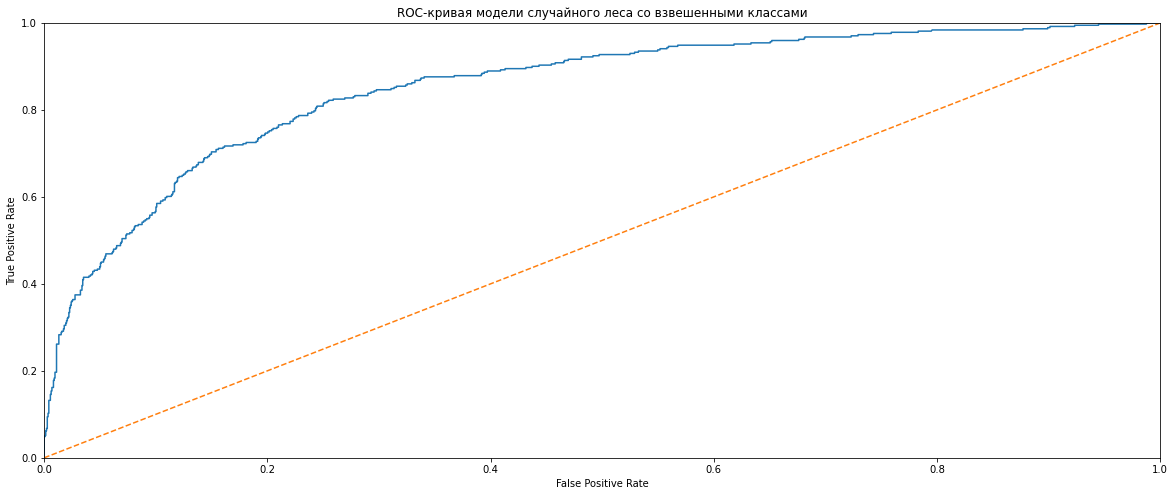

In [124]:
#ROC - кривая случайного леса
fpr, tpr, thresholds = roc_curve(target_valid, RFC_model_cw.predict_proba(features_valid)[:, 1]) 

plt.figure(figsize=(20,8))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая модели случайного леса со взвешенными классами')
plt.show()

In [126]:
#Расчитаем метрику ROC_AUC для логистической регрессии
LR_prob_ones_upsampled = LR.predict_proba(features_test)[:, 1]
LR_auc_roc_after = roc_auc_score(target_test, LR_prob_ones_upsampled)
LR_auc_roc_after

0.7566635682711884

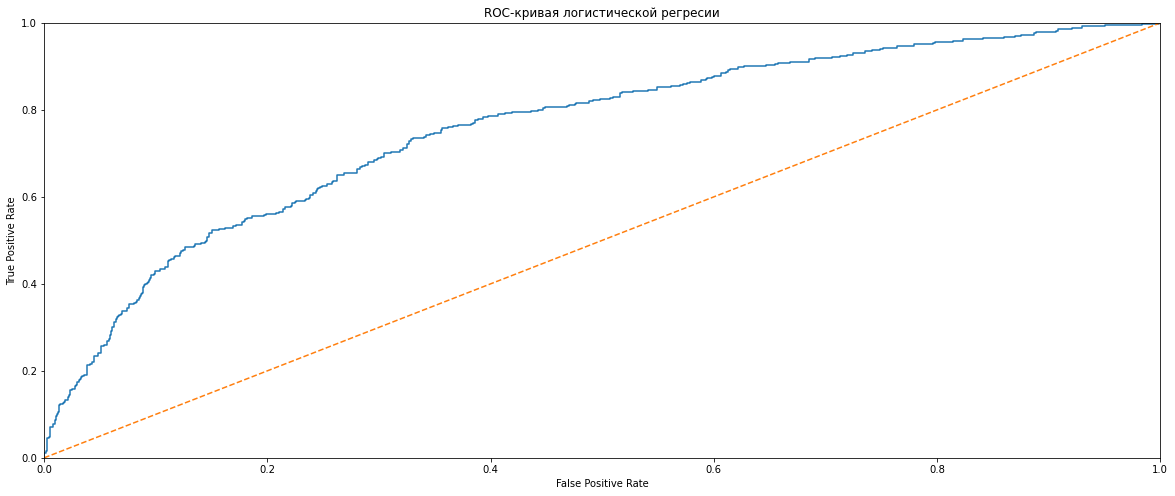

In [127]:
#ROC - кривая логистической регрессии
fpr, tpr, thresholds = roc_curve(target_test, LR_prob_ones_upsampled) 

plt.figure(figsize=(20,8))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая логистической регресии')
plt.show()

# Тестирование лучшей модели

In [130]:
#Добавим модели данных для обучения - соединим тренировочную и валидационную выборки
RFC_model_cw.fit(pd.concat([features_train, features_valid], axis = 0), 
                 pd.concat([target_train, target_valid], axis = 0))
RFC_test_predictions = RFC_model_cw.predict(features_test)

In [132]:
RFC_recall_test = recall_score(target_test, RFC_test_predictions)
RFC_precision_test = precision_score(target_test, RFC_test_predictions)
RFC_f1_test = f1_score(target_test, RFC_test_predictions)
RFC_roc_auc_test = roc_auc_score(target_test, RFC_model_cw.predict_proba(features_test)[:, 1])

RFC_metrics_test = [RFC_recall_test, RFC_precision_test, RFC_f1_test, RFC_roc_auc_test]

names = ['Полнота', 'Точность', 'F1 - мера', 'AUC - ROC']

metrics_RFC = pd.DataFrame(
    {'Мetrics': names,
     'RF test': RFC_metrics_test

    })

metrics_RFC

,Мetrics,RF test
0,Полнота,0.671159
1,Точность,0.536638
2,F1 - мера,0.596407
3,AUC - ROC,0.848812


# Выводы

Данные проанализированы. 
В исходном наборе наблюдается большой разброс числовых переменных. С разбросим справились, приведя все численные переменные к одноу масштабу. Категориальные переменные закодировали методом OHE.

Были проверены модели логистической регрессии и случайного леса на выборке с исходным сотношением целевой переменной и со сбалансированной целевой переменной, причем "балансировка" была выполнена тремя методами:
* 1. Увtличение выборки
* 2. Уменьшение выборки
* 3. Взвешивание классов

Лучше всего (¯\_(ツ)_/¯) себя показала модель случайного леса со "взвешенными" классами. Метрики модели далеки от идеала. Модель предскажет уход клиента почти в 70% случаев, но права будет всего лишь в половине случаев. С точки зрения прогнозирования - kal, но для т.н. "Бета - банка" такая модель позволит обращать внимание на клиентов, готовых уйти от них. Скорее - всего в половине случаев это будет не так, но зато какую заботу почувствуют те, кто не собирается уходить, но кого модель пометит как уходящего!))

